In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load training dataset
train_data = pd.read_csv('../data/train_data.csv')

# Load testing dataset
test_data = pd.read_csv('../data/test_data.csv')

# Let's identify the target variable and features
target = 'sold_price_log'

# Features to include for the gradient boost model
features = ['sqft_log', 'beds_std', 'full_baths_std', 'total_rooms_std', 'zip_code']

# # Encode categorical features and drop rows with NaN values
# train_data_clean = train_data.dropna(subset=features + [target]).copy()
# test_data_clean = test_data.dropna(subset=features + [target]).copy()

# Prepare X (features) and y (target) for training and testing datasets
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [4]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [6]:
# Predict using the trained model
y_pred = gb_model.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Root Mean Squared Error (RMSE): 0.3251371444345614
Mean Absolute Error (MAE): 0.23961743592359172
R-squared (R²): 0.6417211364388198


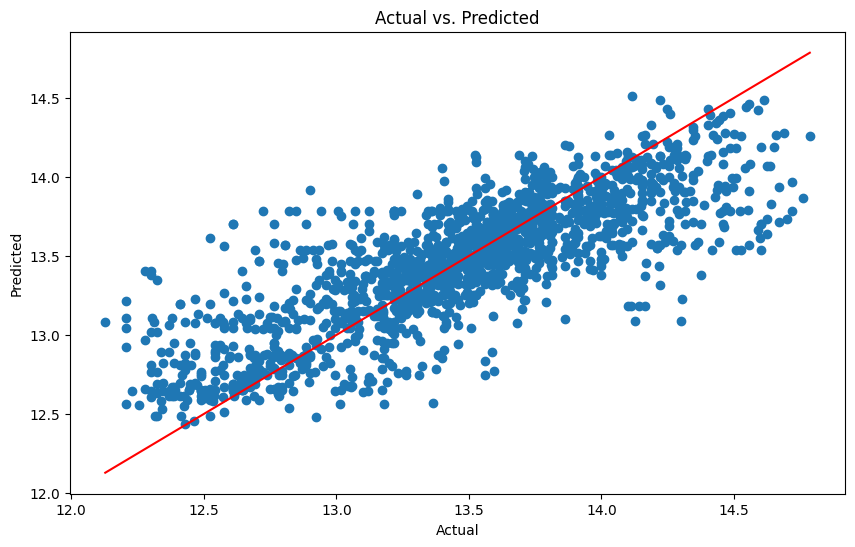

In [7]:
# see the predicted results of the model, using plot:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()